In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import gym

class ReinforceAgent:
    def __init__(self, state_size, action_size, learning_rate=0.001, gamma=0.99):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.build_model()

    def build_model(self):
        input_layer = Input(shape=(self.state_size,))
        dense1 = Dense(24, activation='relu')(input_layer)
        dense2 = Dense(24, activation='relu')(dense1)
        output = Dense(self.action_size, activation='softmax')(dense2)

        self.model = Model(inputs=input_layer, outputs=output)
        self.model.compile(optimizer=Adam(lr=self.learning_rate), loss='categorical_crossentropy')

    def select_action(self, state):
        state = np.reshape(state, [1, self.state_size])
        probabilities = self.model.predict(state)[0]
        action = np.random.choice(self.action_size, p=probabilities)
        return action

    def train(self, states, actions, rewards):
        discounted_rewards = self.discount_rewards(rewards)
        actions_one_hot = tf.one_hot(actions, self.action_size, dtype=tf.float32)

        with tf.GradientTape() as tape:
            logits = self.model(states, training=True)
            loss = tf.nn.softmax_cross_entropy_with_logits(labels=actions_one_hot, logits=logits)
            loss = tf.reduce_mean(loss * discounted_rewards)

        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))

    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        cumulative_reward = 0.0
        for t in reversed(range(len(rewards))):
            cumulative_reward = rewards[t] + cumulative_reward * self.gamma
            discounted_rewards[t] = cumulative_reward
        return discounted_rewards

# Environment setup
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Initialize REINFORCE agent
reinforce_agent = ReinforceAgent(state_size, action_size)

# Training loop
episodes = 1000
for episode in range(episodes):
    state = env.reset()
    states, actions, rewards = [], [], []
    done = False

    while not done:
        action = reinforce_agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = next_state

    reinforce_agent.train(np.array(states), np.array(actions), np.array(rewards))

    # Print episode results
    print(f"Episode: {episode + 1}")

# Evaluate performance and compare with other algorithms
# (To compare with Actor-Critic or other baselines, you would implement those algorithms similarly)


ValueError: Argument(s) not recognized: {'lr': 0.001}

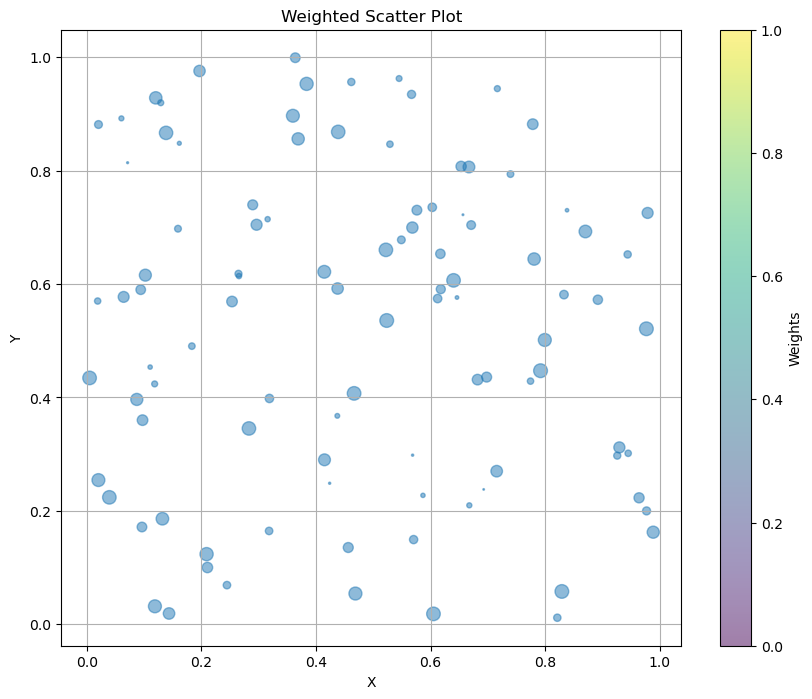

In [2]:
import matplotlib.pyplot as plt

# Example data
np.random.seed(0)
x = np.random.rand(100)
y = np.random.rand(100)
weights = np.random.rand(100) * 100  # Example weights

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=weights, alpha=0.5)
plt.title('Weighted Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Weights')
plt.grid(True)
plt.show()
